In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
import os
import PIL.Image as Image
from typing import Tuple
from LookGenerator.networks.segmentation import UNet, train_unet
from LookGenerator.networks.utils import load_model
import cv2
from LookGenerator.datasets.utils import prepare_image_for_model_transpose, to_array_from_model_bin_transpose
import LookGenerator.datasets.transforms as custom_transforms

In [75]:
image = Image.open(r"C:\Users\DenisovDmitrii\Desktop\test\image2\04054_00.jpg")
img_to_model = prepare_image_for_model_transpose(image)

In [76]:
transform_output = transforms.Compose([
    transforms.Resize((192, 256)),
    custom_transforms.MinMaxScale(),
    custom_transforms.ThresholdTransform(threshold=0.5)
])
model = UNet(in_channels=3, out_channels = 1)

In [77]:
model = load_model(model,
                       r"C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session28\unet_epoch_14_0.00011121442924214092.pt")
modelled = model(img_to_model)

torch.Size([1, 1, 192, 256])
torch.Size([1, 3, 192, 256])


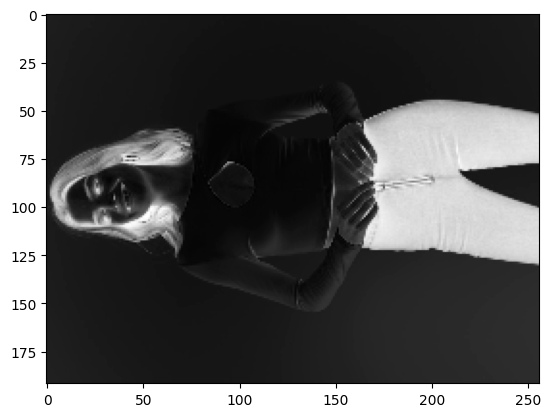

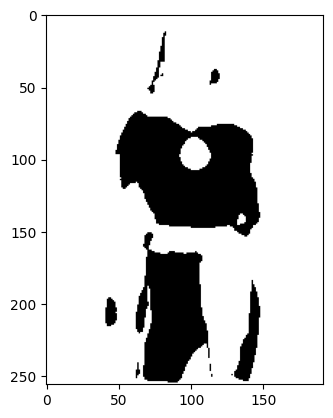

In [78]:
print(modelled.shape)
print(img_to_model.shape)
plt.imshow(np.flip(img_to_model.detach().numpy()[0,0,:,:], axis=0), cmap = 'binary')
plt.show()
modelled_img = to_array_from_model_bin_transpose(transform_output(modelled.detach()))

plt.imshow(modelled_img,cmap = 'binary')
plt.show()

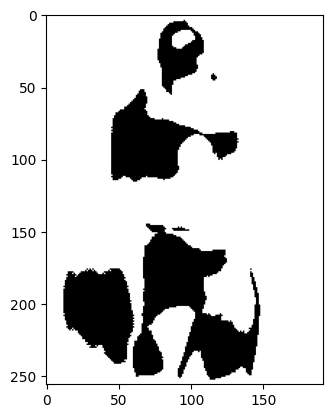

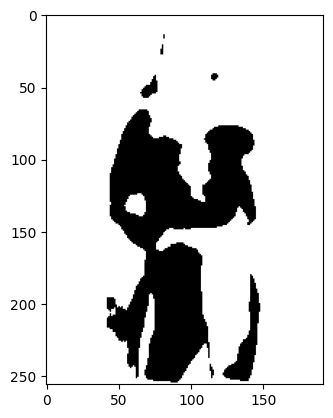

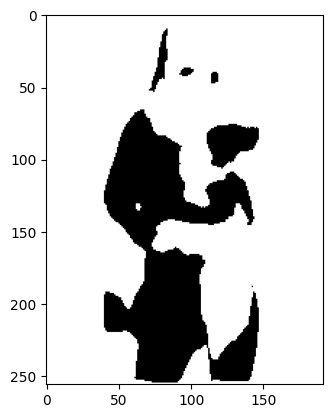

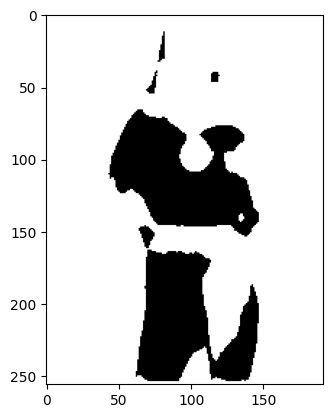

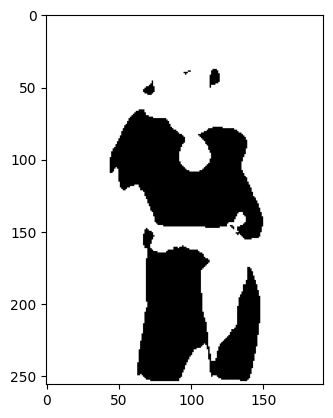

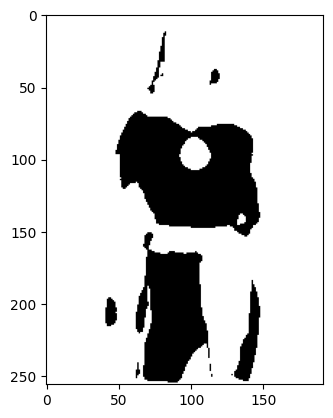

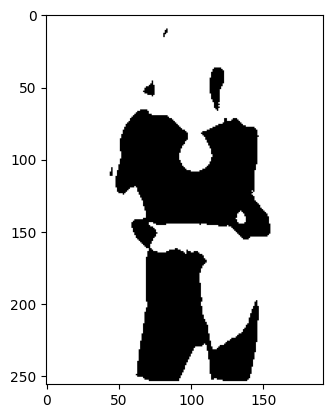

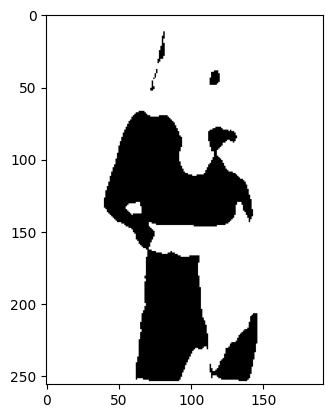

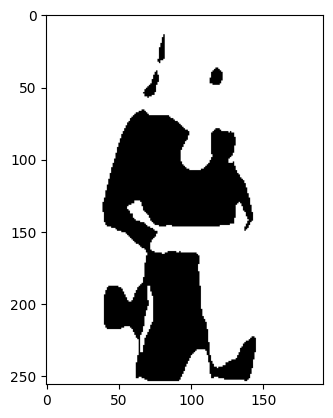

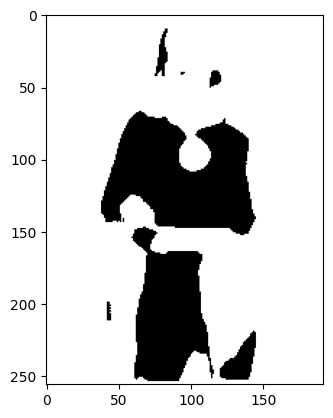

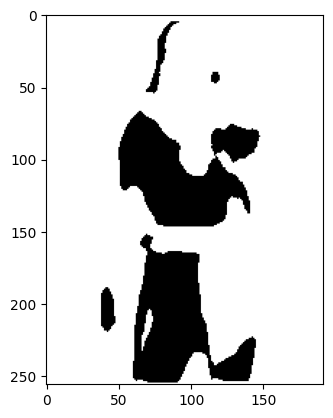

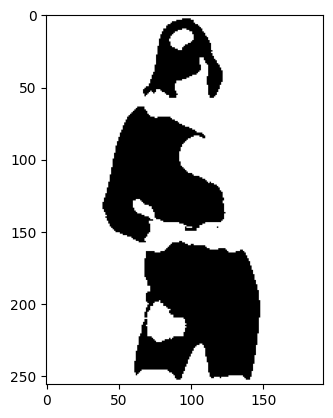

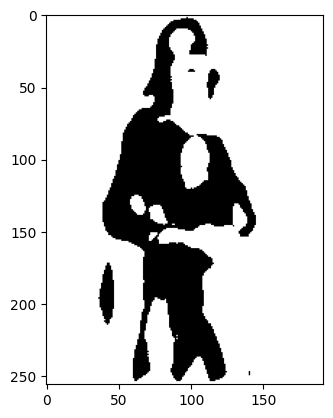

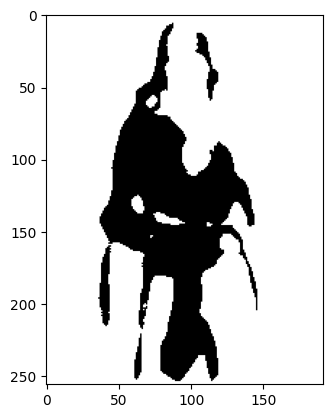

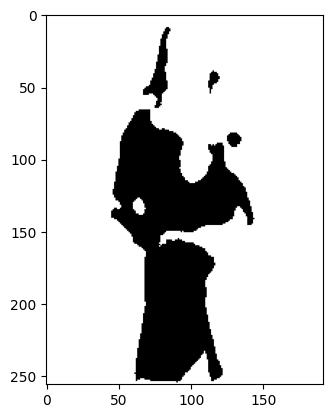

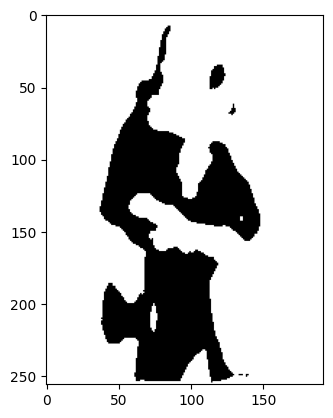

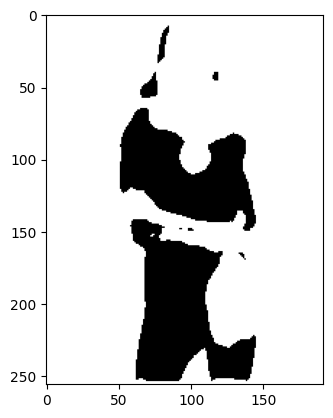

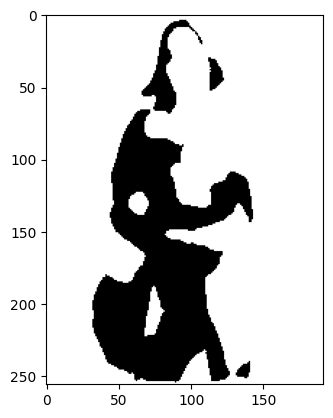

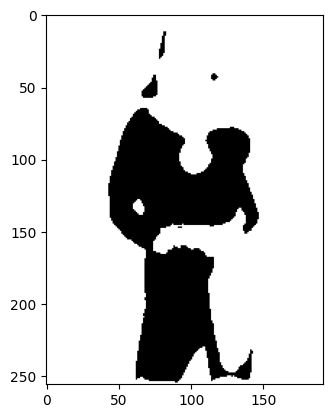

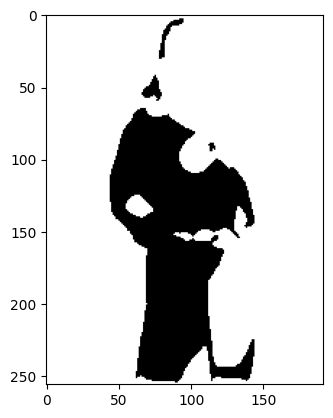

In [79]:
url = r'C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session28'
list_files = os.listdir(url)
for file in list_files:
    model = load_model(model, url + "\\" + file)
    seg = model(img_to_model)

    seg = to_array_from_model_bin_transpose(transform_output(seg.detach()))
    plt.imshow(seg, cmap = 'binary')
    plt.show()

In [74]:
list_files

['unet_epoch_0_0.005777835171335401.pt',
 'unet_epoch_10_0.0006518747536458063.pt',
 'unet_epoch_11_0.00016160868691281977.pt',
 'unet_epoch_12_0.00011978949894397281.pt',
 'unet_epoch_13_0.0001479421056128325.pt',
 'unet_epoch_14_0.00011121442924214092.pt',
 'unet_epoch_15_0.00032268829976927896.pt',
 'unet_epoch_16_8.763441432025642e-05.pt',
 'unet_epoch_17_9.684133650667858e-05.pt',
 'unet_epoch_18_0.00010817352693802371.pt',
 'unet_epoch_19_9.749327141551662e-05.pt',
 'unet_epoch_1_0.0028615023997516776.pt',
 'unet_epoch_2_0.000911614261358642.pt',
 'unet_epoch_3_0.0006476650786890576.pt',
 'unet_epoch_4_0.00033170207517776784.pt',
 'unet_epoch_5_0.0004100911824841602.pt',
 'unet_epoch_6_0.00023944073058000635.pt',
 'unet_epoch_7_0.0013875820908511882.pt',
 'unet_epoch_8_0.00017438461516296509.pt',
 'unet_epoch_9_0.09093908153665371.pt']